In [21]:
import pandas as pd 
import numpy as np
data = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Frequency Distribution of `ca`:
 ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


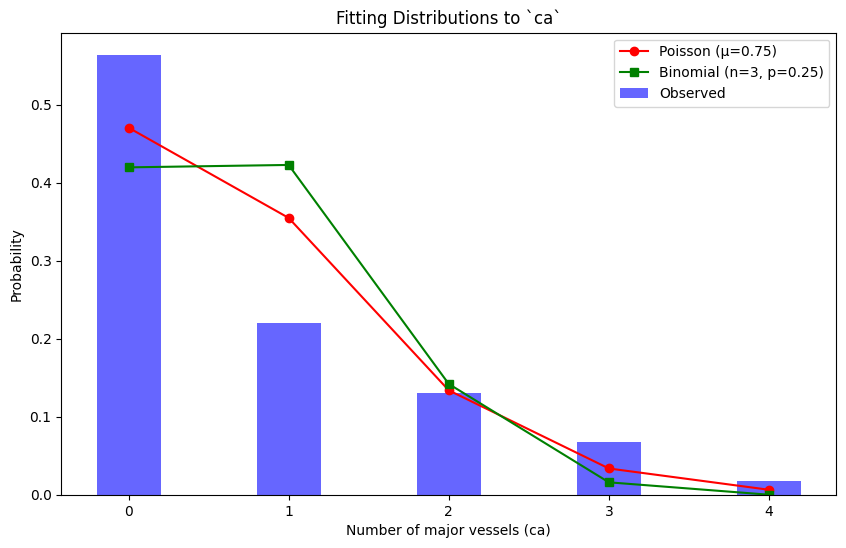

Chi-square test for Poisson: χ² = 126.02, p-value = 0.0000
Chi-square test for Binomial: χ² = inf, p-value = 0.0000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7654: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom, chisquare

# Create DataFrame
df = pd.DataFrame(data)

# Analyze `ca` column
ca_values = df["ca"].value_counts().sort_index()
total_count = len(df)

# Frequency distribution
print("Frequency Distribution of `ca`:\n", ca_values)

# Observed probabilities
observed_prob = ca_values / total_count

# Mean of `ca`
mean_ca = df["ca"].mean()

# Fit Poisson distribution
poisson_dist = poisson(mu=mean_ca)
poisson_pmf = poisson_dist.pmf(ca_values.index)

# Fit Binomial distribution (assume max = 3)
n_trials = 3
p_success = mean_ca / n_trials
binomial_dist = binom(n=n_trials, p=p_success)
binomial_pmf = binomial_dist.pmf(ca_values.index)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.bar(ca_values.index, observed_prob, width=0.4, label="Observed", alpha=0.6, color="blue")
plt.plot(ca_values.index, poisson_pmf, "o-", label=f"Poisson (μ={mean_ca:.2f})", color="red")
plt.plot(ca_values.index, binomial_pmf, "s-", label=f"Binomial (n={n_trials}, p={p_success:.2f})", color="green")
plt.xlabel("Number of major vessels (ca)")
plt.ylabel("Probability")
plt.title("Fitting Distributions to `ca`")
plt.legend()
plt.show()

# Goodness-of-fit tests
# Chi-square test for Poisson
expected_poisson = poisson_pmf * total_count
expected_poisson *= ca_values.sum() / expected_poisson.sum()  # Scale to match observed total
chi2_poisson, p_poisson = chisquare(f_obs=ca_values, f_exp=expected_poisson)

# Chi-square test for Binomial
expected_binomial = binomial_pmf * total_count
expected_binomial *= ca_values.sum() / expected_binomial.sum()  # Scale to match observed total
chi2_binomial, p_binomial = chisquare(f_obs=ca_values, f_exp=expected_binomial)

print(f"Chi-square test for Poisson: χ² = {chi2_poisson:.2f}, p-value = {p_poisson:.4f}")
print(f"Chi-square test for Binomial: χ² = {chi2_binomial:.2f}, p-value = {p_binomial:.4f}")


# Statistical Analysis 

**Descriptive Statistics**:
Descriptive statistics summarize and describe the key features of a dataset, such as central tendency (mean, median), spread (variance, standard deviation), and shape of the distribution.


In [23]:
# Create the DataFrame
train_data = pd.DataFrame(data)

# Display summary statistics
print(train_data.describe())

# Check for null or missing values
print(train_data.isnull().sum())

# Value counts for categorical variables
print("Sex value counts:\n", train_data["sex"].value_counts())
print("Target value counts:\n", train_data["target"].value_counts())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [24]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_data['sex'], train_data['target'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")
if p < 0.05:
    print("Significant relationship between 'sex' and 'target'.")
else:
    print("No significant relationship between 'sex' and 'target'.")


Chi2 Statistic: 78.86305133922973, p-value: 6.656820681726434e-19
Significant relationship between 'sex' and 'target'.


In [25]:
from scipy.stats import ttest_ind

# Separate groups
group_0 = train_data[train_data['target'] == 0]['age']
group_1 = train_data[train_data['target'] == 1]['age']

# Perform T-test
t_stat, p = ttest_ind(group_0, group_1)
print(f"T-Statistic: {t_stat}, p-value: {p}")
if p < 0.05:
    print("Significant difference in 'age' between target groups.")
else:
    print("No significant difference in 'age' between target groups.")


T-Statistic: 7.535591207962243, p-value: 1.0677220241596988e-13
Significant difference in 'age' between target groups.


# EDA

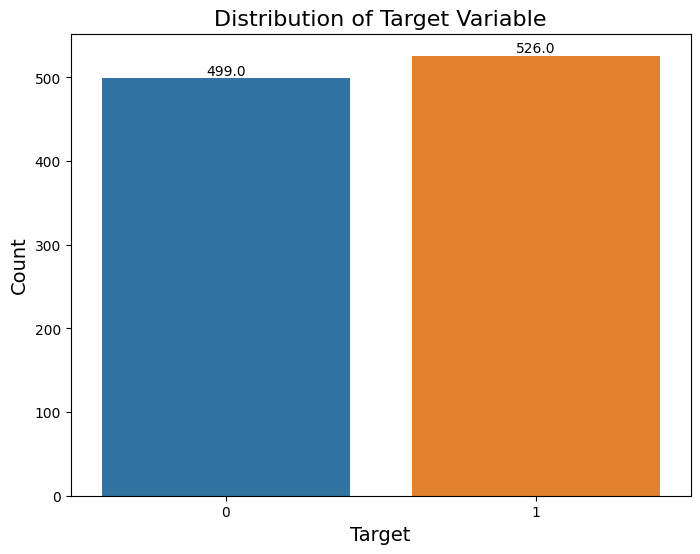

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
ax = sns.countplot(x='target', data=train_data)

# Annotate the bars with counts
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height()),  # Format the number (no decimals)
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at the center of the bar
        ha='center', va='bottom', fontsize=10  # Align text
    )

# Add title and labels
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


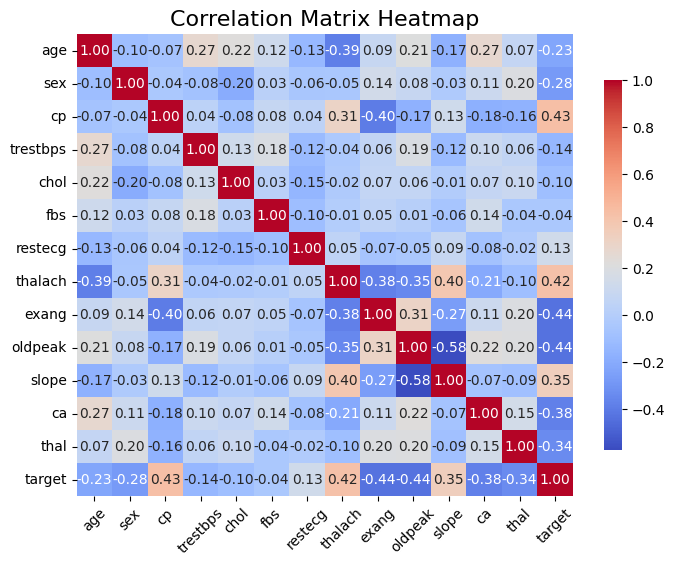

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust the size (width, height)

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Add title and labels
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Show the heatmap
plt.show()


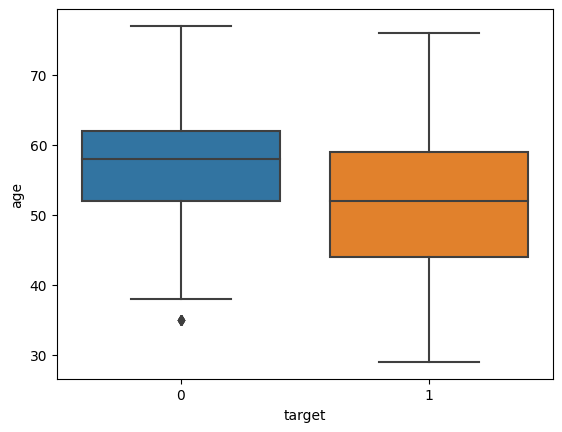

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


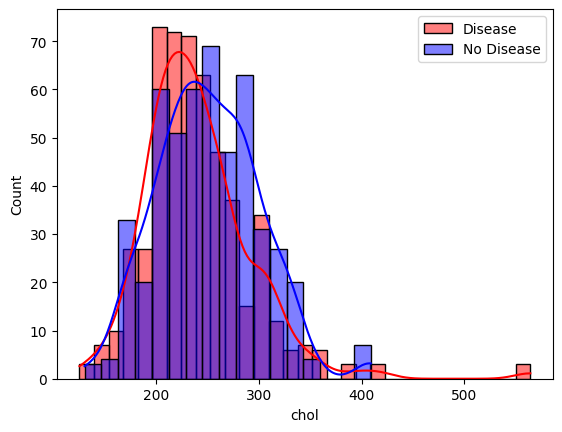

In [28]:
import matplotlib.pyplot as plt
sns.boxplot(x='target', y='age', data=train_data)
plt.show()
sns.histplot(train_data[train_data['target'] == 1]['chol'], kde=True, color='red', label='Disease')
sns.histplot(train_data[train_data['target'] == 0]['chol'], kde=True, color='blue', label='No Disease')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

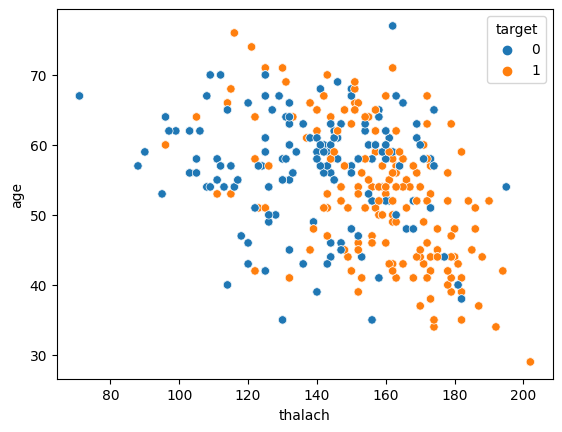

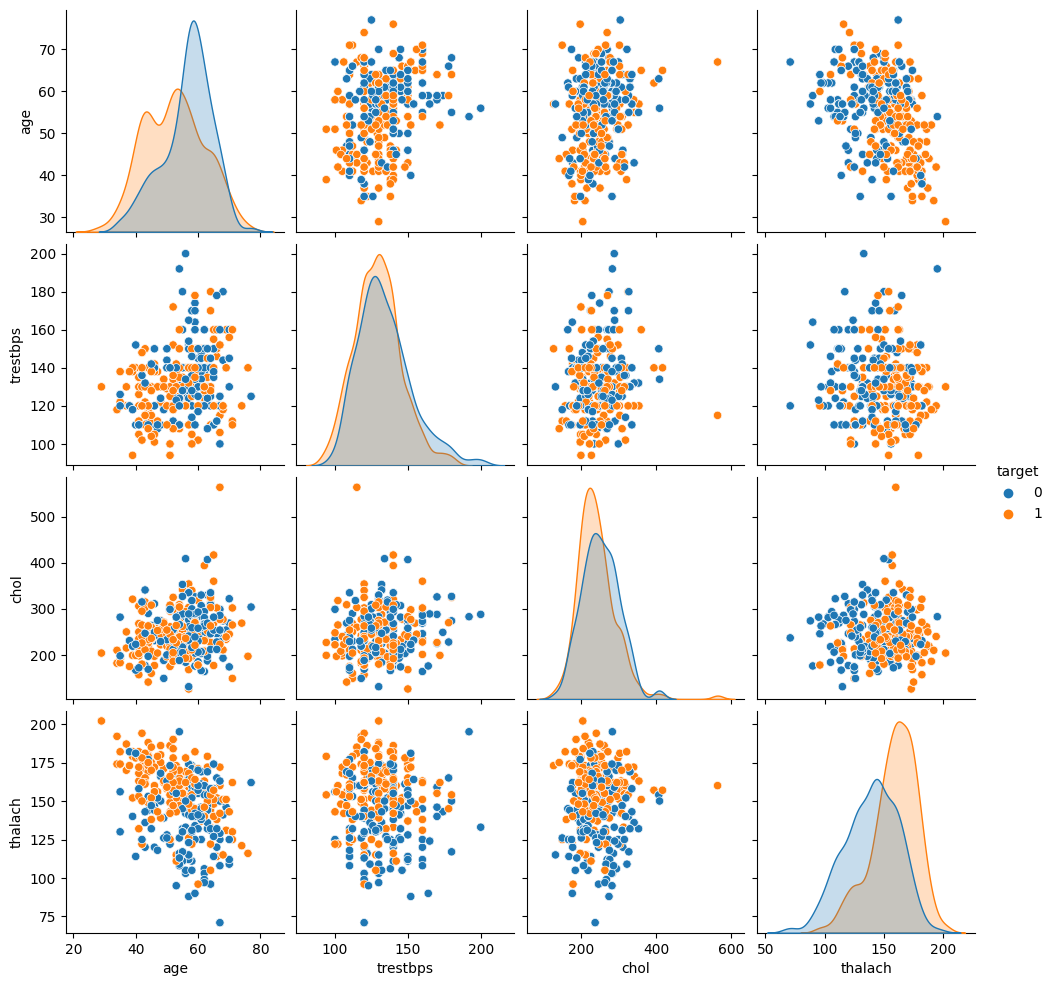

In [29]:
sns.scatterplot(x='thalach', y='age', hue='target', data=train_data)
sns.pairplot(train_data, hue='target', vars=['age', 'trestbps', 'chol', 'thalach'])


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create DataFrame
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df.drop(columns=["target"])  # Features
y = df["target"]                # Target

# splitting the data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [36]:
import joblib

# Save the model
joblib.dump(model, 'trained_model.pkl')

print("Model saved as trained_model.pkl")


Model saved as trained_model.pkl


In [38]:
# Load the model
loaded_model = joblib.load('trained_model.pkl')

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)


In [40]:
# Load the model
loaded_model = joblib.load('trained_model.pkl')

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)
